In [35]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

In [36]:
from tensorflow.keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


In [37]:
#preparing data
import numpy as np

def multi_hot_encode(sequences, num_classes):
    # Creates an all-zero matrix of shape (len(sequences), num_classes)
    results = np.zeros((len(sequences), num_classes))
    for i, sequence in enumerate(sequences):
        # Sets specific indices of results[i] to 1s
        results[i][sequence] = 1.0
    return results


# Vectorized training data
x_train = multi_hot_encode(train_data, num_classes=10000)
# Vectorized test data
x_test = multi_hot_encode(test_data, num_classes=10000)

def one_hot_encode(labels, num_classes=46):
    results = np.zeros((len(labels), num_classes))
    for i, label in enumerate(labels):
        results[i, label] = 1.0
    return results

# Vectorized training labels
y_train = one_hot_encode(train_labels)
# Vectorized test labels
y_test = one_hot_encode(test_labels)

from keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [38]:
#build model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

top_3_accuracy = keras.metrics.TopKCategoricalAccuracy(
    k=3, name="top_3_accuracy"
)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy", top_3_accuracy],
)

In [39]:
#validate the approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
16/16 [==============================] - 0s 12ms/step - loss: 3.2478 - accuracy: 0.4613 - top_3_accuracy: 0.5819 - val_loss: 2.4595 - val_accuracy: 0.5540 - val_top_3_accuracy: 0.6830
Epoch 2/20
16/16 [==============================] - 0s 6ms/step - loss: 1.9368 - accuracy: 0.6244 - top_3_accuracy: 0.7486 - val_loss: 1.5980 - val_accuracy: 0.6530 - val_top_3_accuracy: 0.7870
Epoch 3/20
16/16 [==============================] - 0s 6ms/step - loss: 1.3262 - accuracy: 0.7285 - top_3_accuracy: 0.8252 - val_loss: 1.2998 - val_accuracy: 0.7230 - val_top_3_accuracy: 0.8250
Epoch 4/20
16/16 [==============================] - 0s 6ms/step - loss: 1.0273 - accuracy: 0.7865 - top_3_accuracy: 0.8695 - val_loss: 1.1500 - val_accuracy: 0.7580 - val_top_3_accuracy: 0.8510
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.8184 - accuracy: 0.8324 - top_3_accuracy: 0.9027 - val_loss: 1.0553 - val_accuracy: 0.7770 - val_top_3_accuracy: 0.8720
Epoch 6/20
16/16 [===========

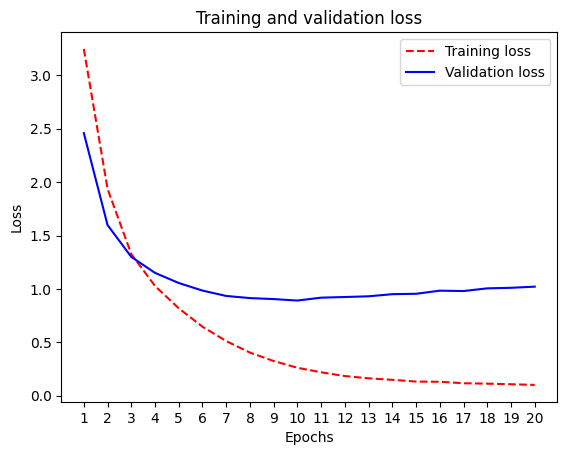

In [40]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

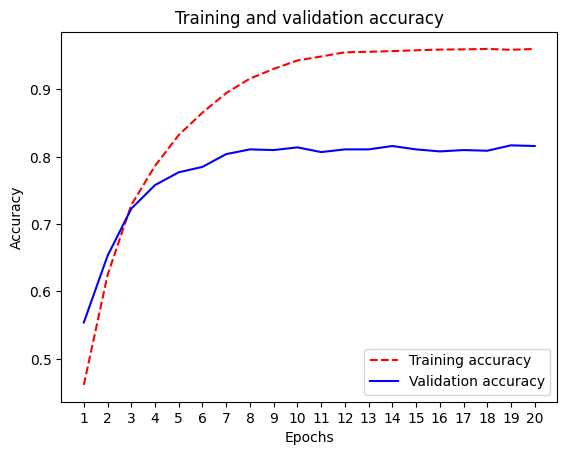

In [41]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

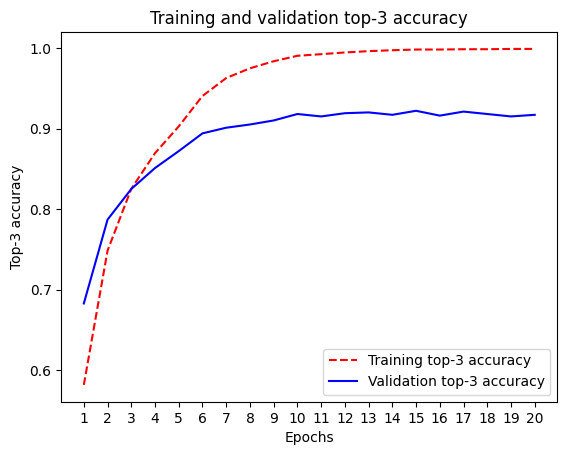

In [42]:
plt.clf()
acc = history.history["top_3_accuracy"]
val_acc = history.history["val_top_3_accuracy"]
plt.plot(epochs, acc, "r--", label="Training top-3 accuracy")
plt.plot(epochs, val_acc, "b", label="Validation top-3 accuracy")
plt.title("Training and validation top-3 accuracy")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Top-3 accuracy")
plt.legend()
plt.show()

In [43]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    x_train,
    y_train,
    epochs=9,
    batch_size=512,
)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/9
18/18 [==============================] - 0s 4ms/step - loss: 3.2934 - accuracy: 0.3174
Epoch 2/9
18/18 [==============================] - 0s 5ms/step - loss: 1.9931 - accuracy: 0.5367
Epoch 3/9
18/18 [==============================] - 0s 5ms/step - loss: 1.3523 - accuracy: 0.7066
Epoch 4/9
18/18 [==============================] - 0s 4ms/step - loss: 1.0283 - accuracy: 0.7725
Epoch 5/9
18/18 [==============================] - 0s 4ms/step - loss: 0.8005 - accuracy: 0.8289
Epoch 6/9
18/18 [==============================] - 0s 4ms/step - loss: 0.6242 - accuracy: 0.8688
Epoch 7/9
18/18 [==============================] - 0s 5ms/step - loss: 0.4862 - accuracy: 0.8990
Epoch 8/9
18/18 [==============================] - 0s 6ms/step - loss: 0.3790 - accuracy: 0.9211
Epoch 9/9
71/71 [==============================] - 0s 717us/step - loss: 0.9390 - accuracy: 0.7925
[0.9389664530754089, 0.7925200462341309]


In [44]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels == test_labels_copy)
hits_array.mean()


0.18655387355298308

In [45]:
#new prediction on new data
predictions = model.predict(x_test)

predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])


71/71 [==============================] - 0s 689us/step


3

In [46]:
#a different way to handle the labels and the loss
y_train_int = train_labels
y_test_int = test_labels

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(46, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",  # or rmsprop in some editions
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(
    x_train,
    y_train_int,
    epochs=10,
    batch_size=512,
    validation_split=0.2,
)


Epoch 1/10
15/15 [==============================] - 1s 16ms/step - loss: 3.4235 - accuracy: 0.4472 - val_loss: 2.6939 - val_accuracy: 0.5832
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 2.1248 - accuracy: 0.6138 - val_loss: 1.7030 - val_accuracy: 0.6667
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 1.4056 - accuracy: 0.7069 - val_loss: 1.3593 - val_accuracy: 0.7117
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 1.0796 - accuracy: 0.7674 - val_loss: 1.2092 - val_accuracy: 0.7385
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.8679 - accuracy: 0.8146 - val_loss: 1.1186 - val_accuracy: 0.7596
Epoch 6/10
15/15 [==============================] - 0s 7ms/step - loss: 0.7086 - accuracy: 0.8500 - val_loss: 1.0694 - val_accuracy: 0.7707
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.5784 - accuracy: 0.8785 - val_loss: 1.0156 - val_accuracy: 0.7858
Epoch 8/10
15/15 [=

In [47]:
#bottleneck model

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [48]:
#actual bottleneck model
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(64, activation="relu"),
        layers.Dense(4, activation="relu"),   # <-- bottleneck layer
        layers.Dense(46, activation="softmax"),
    ]
)

model.compile(
    optimizer="adam",                        # or rmsprop, match your book
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_bottleneck = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)


Epoch 1/20
63/63 [==============================] - 1s 4ms/step - loss: 2.8631 - accuracy: 0.3786 - val_loss: 1.9234 - val_accuracy: 0.5500
Epoch 2/20
63/63 [==============================] - 0s 2ms/step - loss: 1.6383 - accuracy: 0.5861 - val_loss: 1.5061 - val_accuracy: 0.6400
Epoch 3/20
63/63 [==============================] - 0s 2ms/step - loss: 1.3249 - accuracy: 0.6642 - val_loss: 1.3909 - val_accuracy: 0.6490
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 1.1584 - accuracy: 0.6847 - val_loss: 1.3350 - val_accuracy: 0.6570
Epoch 5/20
63/63 [==============================] - 0s 2ms/step - loss: 1.0382 - accuracy: 0.7058 - val_loss: 1.3164 - val_accuracy: 0.6690
Epoch 6/20
63/63 [==============================] - 0s 2ms/step - loss: 0.9370 - accuracy: 0.7415 - val_loss: 1.2987 - val_accuracy: 0.6770
Epoch 7/20
63/63 [==============================] - 0s 2ms/step - loss: 0.8475 - accuracy: 0.7745 - val_loss: 1.2956 - val_accuracy: 0.6910
Epoch 8/20
63/63 [==